# Ciência de Dados para Negócios III - Trabalho 3 - Regressão Logística

**Aluno**: Antônio Arthur Silva de Lima

**Matrícula**: 508492

**Professor**: Victor Aguiar Evangelista de Farias

**Data**: 02/11/2025

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

## Implementação

### Acurácia, Sensibilidade e Valor Preditivo Positivo

In [2]:
# função para acurácia
def accuracy(numpy_array):
  tn, fp, fn, tp = numpy_array.ravel()
  return (tp + tn)/(tp + tn + fp + fn)

# função para sensibilidade
def recall(numpy_array):
  tn, fp, fn, tp = numpy_array.ravel()
  return tp/(tp + fn)

# função para valor preditivo positivo
def precision(numpy_array):
  tn, fp, fn, tp = numpy_array.ravel()
  return tp/(tp + fp)

### Padronização

In [3]:
# função para padronização
def standardize(v):
  new_v = (v - np.mean(v))/np.std(v)

  return new_v

## Experimento 1

### Carregando o conjunto de dados

In [4]:
df = np.loadtxt('artificial2d.csv', delimiter=',')
print(df[:5, :])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


### Embaralhando o conjunto de dados

In [5]:
np.random.seed(508492)
np.random.shuffle(df)
print(df[:5, :])

[[69.36458876 97.71869196  1.        ]
 [51.54772027 46.85629026  0.        ]
 [61.83020602 50.25610789  0.        ]
 [34.62365962 78.02469282  0.        ]
 [58.84095622 75.85844831  1.        ]]


### Separando as variáveis

In [6]:
X = df[:, :2]
y = df[:, -1]

print(X[:5, :])
print(y[:5])

[[69.36458876 97.71869196]
 [51.54772027 46.85629026]
 [61.83020602 50.25610789]
 [34.62365962 78.02469282]
 [58.84095622 75.85844831]]
[1. 0. 0. 0. 1.]


### Padronização de variáveis

In [7]:
X[:, 0] = standardize(X[:, 0])
X[:, 1] = standardize(X[:, 1])

print(X[:5, :])

[[ 0.1921582   1.70347834]
 [-0.72810195 -1.0473818 ]
 [-0.19700066 -0.86350486]
 [-1.60224763  0.63834112]
 [-0.35139858  0.52118118]]


### Train-Test Split

In [8]:
n = np.shape(X)[0]
i_final = round(n*0.7)

X_train = X[:i_final]
y_train = y[:i_final]
X_test  = X[i_final:]
y_test  = y[i_final:]

print(X_train[:5, :])
print(y_train[:5])
print(X_test[:5, :])
print(y_test[:5])

[[ 0.1921582   1.70347834]
 [-0.72810195 -1.0473818 ]
 [-0.19700066 -0.86350486]
 [-1.60224763  0.63834112]
 [-0.35139858  0.52118118]]
[1. 0. 0. 0. 1.]
[[ 1.56075461 -1.51418452]
 [-1.34839922  0.53082781]
 [ 1.28116721  1.15128248]
 [-1.21735452  0.68269533]
 [ 1.02063763 -0.49595429]]
[0. 0. 1. 0. 1.]


### Ajuste e Predição

In [9]:
# ajuste aos dados de treino
m1 = LogisticRegression(penalty = None)
m1.fit(X_train, y_train)

# predição para os dados de teste
y_hat = m1.predict(X_test)

print(y_hat[:5])

[1. 0. 1. 0. 1.]


### Avaliação

In [10]:
# obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_hat)
print('Matriz de confusão:\n')
print(cm)
print('')

# acuracidade
acuracidade = accuracy(cm)
print(f'Acurácia: {acuracidade:.3f}')

# sensibilidade
sensibilidade = recall(cm)
print(f'Sensibilidade: {sensibilidade:.3f}')

# valor preditivo positivo
valor_pred_pos = precision(cm)
print(f'Valor preditivo positivo: {valor_pred_pos:.3f}')

Matriz de confusão:

[[15  1]
 [ 1 13]]

Acurácia: 0.933
Sensibilidade: 0.929
Valor preditivo positivo: 0.929


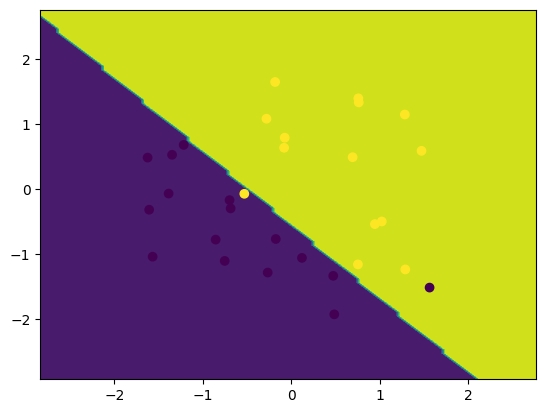

In [11]:
# fronteira de classificação
DecisionBoundaryDisplay.from_estimator(estimator = m1, X = X, response_method = 'predict')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
plt.show()

## Experimento 2

### Carregando o conjunto de dados

In [12]:
df = np.loadtxt('artificial2d.csv', delimiter=',')
print(df[:5, :])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


### Embaralhando o conjunto de dados

In [13]:
np.random.seed(508492)
np.random.shuffle(df)
print(df[:5, :])

[[69.36458876 97.71869196  1.        ]
 [51.54772027 46.85629026  0.        ]
 [61.83020602 50.25610789  0.        ]
 [34.62365962 78.02469282  0.        ]
 [58.84095622 75.85844831  1.        ]]


### Separando as variáveis

In [14]:
X = df[:, :2]
y = df[:, -1]

print(X[:5, :])
print(y[:5])

[[69.36458876 97.71869196]
 [51.54772027 46.85629026]
 [61.83020602 50.25610789]
 [34.62365962 78.02469282]
 [58.84095622 75.85844831]]
[1. 0. 0. 0. 1.]


### Novas Colunas



In [15]:
X = np.c_[X, np.power(X[:, 0], 2), np.power(X[:, 1], 2)]
print(X[:5, :])

[[  69.36458876   97.71869196 4811.4461738  9548.94275874]
 [  51.54772027   46.85629026 2657.16746494 2195.51193726]
 [  61.83020602   50.25610789 3822.97437686 2525.6763805 ]
 [  34.62365962   78.02469282 1198.79780579 6087.85268893]
 [  58.84095622   75.85844831 3462.25812856 5754.50418042]]


### Padronização de variáveis

In [16]:
X[:, 0] = standardize(X[:, 0])
X[:, 1] = standardize(X[:, 1])
X[:, 2] = standardize(X[:, 2])
X[:, 3] = standardize(X[:, 3])

print(X[:5, :])

[[ 0.1921582   1.70347834  0.05028191  1.93663979]
 [-0.72810195 -1.0473818  -0.79970134 -1.01685763]
 [-0.19700066 -0.86350486 -0.33972541 -0.88424744]
 [-1.60224763  0.63834112 -1.3751096   0.54649676]
 [-0.35139858  0.52118118 -0.48204812  0.4126077 ]]


### Train-Test Split

In [17]:
n = np.shape(X)[0]
i_final = round(n*0.7)

X_train = X[:i_final]
y_train = y[:i_final]
X_test  = X[i_final:]
y_test  = y[i_final:]

print(X_train[:5, :])
print(y_train[:5])
print(X_test[:5, :])
print(y_test[:5])

[[ 0.1921582   1.70347834  0.05028191  1.93663979]
 [-0.72810195 -1.0473818  -0.79970134 -1.01685763]
 [-0.19700066 -0.86350486 -0.33972541 -0.88424744]
 [-1.60224763  0.63834112 -1.3751096   0.54649676]
 [-0.35139858  0.52118118 -0.48204812  0.4126077 ]]
[1. 0. 0. 0. 1.]
[[ 1.56075461 -1.51418452  1.77764405 -1.3118045 ]
 [-1.34839922  0.53082781 -1.23130092  0.42348934]
 [ 1.28116721  1.15128248  1.37973552  1.17705981]
 [-1.21735452  0.68269533 -1.14960276  0.59816793]
 [ 1.02063763 -0.49595429  1.02976116 -0.59134398]]
[0. 0. 1. 0. 1.]


### Ajuste e Predição

In [18]:
# ajuste aos dados de treino
m2 = LogisticRegression(penalty = None)
m2.fit(X_train, y_train)

# predição para os dados de teste
y_hat_2 = m2.predict(X_test)

print(y_hat_2[:5])

[0. 0. 1. 1. 1.]


### Avaliação

In [19]:
# obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_hat_2)
print('Matriz de confusão:\n')
print(cm)
print('')

# acuracidade
acuracidade = accuracy(cm)
print(f'Acurácia: {acuracidade:.3f}')

# sensibilidade
sensibilidade = recall(cm)
print(f'Sensibilidade: {sensibilidade:.3f}')

# valor preditivo positivo
valor_pred_pos = precision(cm)
print(f'Valor preditivo positivo: {valor_pred_pos:.3f}')

Matriz de confusão:

[[12  4]
 [ 0 14]]

Acurácia: 0.867
Sensibilidade: 1.000
Valor preditivo positivo: 0.778


## Eperimento 3

In [20]:
# valores de C para a regularização
c = [None, 1/1000, 1/100, 1/10, 1, 10, 100]

for i in c:
  print(f'\nModelo ajustado com C = {i}\n')

  if i == None:
    modelo = LogisticRegression(penalty = i)
  else:
    modelo = LogisticRegression(penalty = 'l2', C = i)

  modelo.fit(X_train, y_train)

  y_hat = modelo.predict(X_test)

  cm = confusion_matrix(y_test, y_hat)

  acuracidade = accuracy(cm)
  sensibilidade = recall(cm)
  valor_pred_pos = precision(cm)

  print(f'Acurácia: {acuracidade:.3f}')
  print(f'Sensibilidade: {sensibilidade:.3f}')
  print(f'Valor preditivo positivo: {valor_pred_pos:.3f}')
  print('\n-------------------------------------')



Modelo ajustado com C = None

Acurácia: 0.867
Sensibilidade: 1.000
Valor preditivo positivo: 0.778

-------------------------------------

Modelo ajustado com C = 0.001

Acurácia: 0.467
Sensibilidade: 1.000
Valor preditivo positivo: 0.467

-------------------------------------

Modelo ajustado com C = 0.01

Acurácia: 0.500
Sensibilidade: 1.000
Valor preditivo positivo: 0.483

-------------------------------------

Modelo ajustado com C = 0.1

Acurácia: 0.900
Sensibilidade: 1.000
Valor preditivo positivo: 0.824

-------------------------------------

Modelo ajustado com C = 1

Acurácia: 0.933
Sensibilidade: 0.929
Valor preditivo positivo: 0.929

-------------------------------------

Modelo ajustado com C = 10

Acurácia: 0.967
Sensibilidade: 1.000
Valor preditivo positivo: 0.933

-------------------------------------

Modelo ajustado com C = 100

Acurácia: 0.967
Sensibilidade: 1.000
Valor preditivo positivo: 0.933

-------------------------------------
